# Multi-Layer Neural Nets

In this exercise you will implement two-layer and three-layer networks from scratch using a  modular approach. For each layer you will implement a `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, theta):
  """ Receive inputs x and weights theta """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, theta, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive derivative of loss with respect to outputs and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, theta, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dtheta = # Derivative of loss with respect to w
  
  return dx, dtheta
```

After implementing a bunch of layers this way, you will be able to easily combine them to build classifiers with different architectures.
  

In [25]:
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
from gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from solver2 import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the CIFAR10 Dataset

In [2]:
import pickle
import numpy as np
import os
#from scipy.misc import imread
from imageio import imread
def load_CIFAR_batch(filename,encoding='latin1'):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f,encoding = 'latin1')
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for classifiers. These are the same steps as we used for the SVM, but
    condensed to a single function.
    """
    # Load the raw CIFAR-10 data (CHANGE THE PATH BELOW)
    cifar10_dir = 'datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    
    # Transpose so that channels come first
    X_train = X_train.transpose(0, 3, 1, 2).copy()
    X_val = X_val.transpose(0, 3, 1, 2).copy()
    X_test = X_test.transpose(0, 3, 1, 2).copy()

    # Package data into a dictionary
    return {
      'X_train': X_train, 'y_train': y_train,
      'X_val': X_val, 'y_val': y_val,
      'X_test': X_test, 'y_test': y_test,
    }

In [3]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.items():
  print ('%s: ' % k, v.shape)

X_train:  (49000, 3, 32, 32)
y_train:  (49000,)
X_val:  (1000, 3, 32, 32)
y_val:  (1000,)
X_test:  (1000, 3, 32, 32)
y_test:  (1000,)


# Affine layer: foward

Complete the following code cell to implement the forward propagation for each layer, later you will call this function for each layer when you do forward propagation.

In [4]:
def affine_forward(x, theta, theta0):
    """
      Computes the forward pass for an affine (fully-connected) layer.

      The input x has shape (m, d_1, ..., d_k) and contains a minibatch of m
      examples, where each example x[i] has shape (d_1, ..., d_k). We will
      reshape each input into a vector of dimension d = d_1 * ... * d_k, and
      then transform it to an output vector of dimension h.

      Inputs:
      - x: A numpy array containing input data, of shape (m, d_1, ..., d_k)
      - theta: A numpy array of weights, of shape (d, h)
      - theta0: A numpy array of biases, of shape (h,)

      Returns a tuple of:
      - out: output, of shape (m, h)
      - cache: (x, theta, theta0)
    """
    out = None
    #############################################################################
    # TODO: Implement the affine forward pass. Store the result in out. You     #
    # will need to reshape the input into rows.                                 #
    #############################################################################
    # 2 lines of code expected

    out = np.dot(x.reshape(x.shape[0], np.prod(x.shape[1:])), theta) + theta0
    
    
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    cache = (x, theta, theta0)
    return out, cache

# Affine layer: foward test

In [5]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
theta = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape),output_dim)
theta0 = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, theta, theta0)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around 1e-9.
print ('Testing affine_forward function:')
print ('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769847728806635e-10


# Affine layer: backward
Now implement the `affine_backward` function and test your implementation using numeric gradient checking. The function will be called by each layer when you do backward propagation.

In [6]:
def affine_backward(dout, cache):
    """
      Computes the backward pass for an affine layer.

      Inputs:
      - dout: Upstream derivative, of shape (m, h)
      - cache: Tuple of:
        - x: Input data, of shape (m, d_1, ... d_k)
        - theta: Weights, of shape (d,h)
        - theta0: biases, of shape (h,)

      Returns a tuple of:
      - dx: Gradient with respect to x, of shape (m, d1, ..., d_k)
      - dtheta: Gradient with respect to theta, of shape (d, h)
      - dtheta0: Gradient with respect to theta0, of shape (h,)
    """
    x, theta, theta0 = cache
    dx, dtheta, dtheta0 = None, None, None
    #############################################################################
    # TODO: Implement the affine backward pass.                                 #
    #############################################################################
    # Hint: do not forget to reshape x into (m,d) form
    # 4-5 lines of code expected
    
    x, theta, theta0 = cache[0], cache[1], cache[2]

    new = x.reshape(x.shape[0], np.prod(x.shape[1:]))
    dtheta = new.T.dot(dout)
    dx = dout.dot(theta.T).reshape(x.shape)
    dtheta0 = np.sum(dout, axis=0)
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return dx, dtheta, dtheta0



# Affine layer: backward test

In [7]:
# Test the affine_backward function

x = np.random.randn(10, 2, 3)
theta = np.random.randn(6, 5)
theta0 = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, theta, theta0)[0], x, dout)
dtheta_num = eval_numerical_gradient_array(lambda theta: affine_forward(x, theta, theta0)[0], theta, dout)
dtheta0_num = eval_numerical_gradient_array(lambda theta0: affine_forward(x, theta, theta0)[0], theta0, dout)

_, cache = affine_forward(x, theta, theta0)
dx, dtheta, dtheta0 = affine_backward(dout, cache)


# The error should be less than 1e-09
print ('Testing affine_backward function:')
print ('dx error: {}'.format(rel_error(dx_num, dx)) )
print ('dtheta error: {}'.format(rel_error(dtheta_num, dtheta)))
print ('dtheta0 error: {}'.format(rel_error(dtheta0_num, dtheta0)))

Testing affine_backward function:
dx error: 1.4307659870021845e-09
dtheta error: 1.5343235339001236e-10
dtheta0 error: 7.978263381150087e-12


# ReLU layer: forward
Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using the following:

The relu function is:

f(x) = max(x, 0)

In [8]:
def relu_forward(x):
    """
      Computes the forward pass for a layer of rectified linear units (ReLUs).

      Input:
      - x: Inputs, of any shape

      Returns a tuple of:
      - out: Output, of the same shape as x
      - cache: x
    """
    out = None
    #############################################################################
    # TODO: Implement the ReLU forward pass.                                    #
    #############################################################################
    # 1 line of code expected
    out = np.maximum(0, x)
    
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    cache = x
    return out, cache


# ReLU layer: forward test

In [9]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)


out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be around 1e-8
print ('Testing relu_forward function:')
print ('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


# ReLU layer: backward
Now implement the backward pass for the ReLU activation function in the `relu_backward` function and test your implementation using numeric gradient checking:

In [10]:

def relu_backward(dout, cache):
    """
      Computes the backward pass for a layer of rectified linear units (ReLUs).

      Input:
      - dout: Upstream derivatives, of any shape
      - cache: Input x, of same shape as dout

      Returns:
      - dx: Gradient with respect to x
    """
    dx, x = None, cache
    #############################################################################
    # TODO: Implement the ReLU backward pass.                                   #
    #############################################################################
    # 1 line of code expected. Hint: use np.where
    # newx: m,d
    
    dx = np.where(np.maximum(0, cache) > 0, 1, 0) * dout
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return dx

# ReLU layer: backward test

In [11]:
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)


# The error should be around 1e-12
print ('Testing relu_backward function:')
print ('dx error: {} '.format(rel_error(dx_num, dx)))

Testing relu_backward function:
dx error: 3.2756076815352877e-12 


# "Sandwich" layers
There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity. To make these common patterns easy, we define several convenience layers in the following code cells.

For now take a look at the `affine_relu_forward` and `affine_relu_backward` functions, and run the following to numerically gradient check the backward pass:

In [12]:
from layers import *

def affine_relu_forward(x, theta, theta0):
    """
      Convenience layer that perorms an affine transform followed by a ReLU

      Inputs:
      - x: Input to the affine layer
      - theta, theta0: Weights for the affine layer

      Returns a tuple of:
      - out: Output from the ReLU
      - cache: Object to give to the backward pass
    """
    a, fc_cache = affine_forward(x, theta, theta0)
    out, relu_cache = relu_forward(a)
    cache = (fc_cache, relu_cache)
    return out, cache


def affine_relu_backward(dout, cache):
    """
      Backward pass for the affine-relu convenience layer
    """
    fc_cache, relu_cache = cache
    da = relu_backward(dout, relu_cache)
    dx, dtheta, dtheta0 = affine_backward(da, fc_cache)
    return dx, dtheta, dtheta0


In [13]:
x = np.random.randn(2, 3, 4)
theta = np.random.randn(12, 10)
theta0 = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, theta, theta0)
dx, dtheta, dtheta0 = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, theta, theta0)[0], x, dout)
dtheta_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, theta, theta0)[0], theta, dout)
dtheta0_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, theta, theta0)[0], theta0, dout)

print ('Testing affine_relu_backward:')
print ('dx error: ', rel_error(dx_num, dx))
print ('dtheta error: ', rel_error(dtheta_num, dtheta))
print ('dtheta0 error: ', rel_error(dtheta0_num, dtheta0))

Testing affine_relu_backward:
dx error:  1.2103315833269131e-10
dtheta error:  7.468701095647044e-09
dtheta0 error:  3.621706051760098e-10


# Loss layers: Softmax and SVM


In [14]:
def softmax_loss(x, y):
    """
      Computes the loss and gradient for softmax classification.

      Inputs:
      - x: Input data, of shape (m, C) where x[i, j] is the score for the jth class
        for the ith input.
      - y: Vector of labels, of shape (m,) where y[i] is the label for x[i] and
        0 <= y[i] < C

      Returns a tuple of:
      - loss: Scalar giving the loss
      - dx: Gradient of the loss with respect to x
    """
    probs = np.exp(x - np.max(x, axis=1, keepdims=True))
    probs /= np.sum(probs, axis=1, keepdims=True)
    m = x.shape[0]
    loss = -np.sum(np.log(probs[np.arange(m), y])) / m
    dx = probs.copy()
    dx[np.arange(m), y] -= 1
    dx /= m
    return loss, dx

In [15]:
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be 2.3 and dx error should be 1e-8
print ('\nTesting softmax_loss:')
print ('loss: ', loss)
print ('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.3027805434817226
dx error:  7.996205419927537e-09


# Two-layer network

Complete the implementation of the `TwoLayerNet` class in the following code cell. This class will serve as a model for the other networks you will implement in this assignment.  Read through it to make sure you understand the API. After implementing it you can run the cell below to test your implementation.

In [16]:
class TwoLayerNet(object):
    """
    A two-layer fully-connected neural network with ReLU nonlinearity and
    softmax loss that uses a modular layer design. We assume an input dimension
    of d, a hidden dimension of h, and perform classification over C classes.
  
    The architecure should be affine - relu - affine - softmax.

    Note that this class does not implement gradient descent; instead, it
    will interact with a separate Solver object that is responsible for running
    optimization.

    The learnable parameters of the model are stored in the dictionary
    self.params that maps parameter names to numpy arrays.
    """
  
    def __init__(self, input_dim=3*32*32, hidden_dim=100, num_classes=10,
               weight_scale=1e-3, reg=0.0):
        """
        Initialize a new network.
        
        Inputs:
        - input_dim: An integer giving the size of the input
        - hidden_dim: An integer giving the size of the hidden layer
        - num_classes: An integer giving the number of classes to classify
        - dropout: Scalar between 0 and 1 giving dropout strength.
        - weight_scale: Scalar giving the standard deviation for random
            initialization of the weights.
        - reg: Scalar giving L2 regularization strength.
        """
        self.params = {}
        self.reg = reg
    
        ############################################################################
        # TODO: Initialize the weights and biases of the two-layer net. Weights    #
        # should be initialized from a zero-mean Gaussian with stdev equal to      #
        # weight_scale, and biases should be initialized to zero. All weights and  #
        # biases should be stored in the dictionary self.params, with first layer  #
        # weights and biases using the keys 'theta1' and 'theta1_0' and second     #
        # layer weights and biases using the keys 'theta2' and 'theta2_0.          #
        # theta1 has shape (input_dim,hidden-dim), theta1_0 shape is (hidden_dim,) #
        # theta2 shape is (hidden_dim,num_classes), theta2_0 shape is (num_classes,)#
        ############################################################################
        # 4 lines of code expected
        self.params['theta1'] = np.random.normal(scale=weight_scale, size=(input_dim, hidden_dim))
        self.params['theta1_0'] = np.zeros(hidden_dim)
        
        self.params['theta2'] = np.random.normal(scale=weight_scale, size=(hidden_dim, num_classes))
        self.params['theta2_0'] = np.zeros(num_classes)
        
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################


    def loss(self, X, y=None):
        """
        Compute loss and gradient for a minibatch of data.
        
        Inputs:
        - X: Array of input data of shape (m, d_1, ..., d_k)
        - y: Array of labels, of shape (m,). y[i] gives the label for X[i].

        Returns:
        If y is None, then run a test-time forward pass of the model and return:
        - scores: Array of shape (m, C) giving classification scores, where
            scores[i, c] is the classification score for X[i] and class c.

        If y is not None, then run a training-time forward and backward pass and
        return a tuple of:
        - loss: Scalar value giving the loss
        - grads: Dictionary with the same keys as self.params, mapping parameter
        names to gradients of the loss with respect to those parameters.
        """  
        scores = None
        ############################################################################
        # TODO: Implement the forward pass for the two-layer net, computing the    #
        # class scores for X and storing them in the scores variable.              #
        ############################################################################
        # Hint: unpack the weight parameters from self.params
        # then calculate output of two layer network using functions defined before
        # 3 lines of code expected
        out_1, cache1 = affine_relu_forward(X, self.params['theta1'], self.params['theta1_0'])
        out_2, cache2 = affine_forward(out_1, self.params['theta2'], self.params['theta2_0'])
        scores = out_2
        
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################

        # If y is None then we are in test mode so just return scores
        if y is None:
            return scores
    
        loss, grads = 0, {}
        ############################################################################
        # TODO: Implement the backward pass for the two-layer net. Store the loss  #
        # in the loss variable and gradients in the grads dictionary. Compute data #
        # loss using softmax, and make sure that grads[k] holds the gradients for  #
        # self.params[k]. Don't forget to add L2 regularization!                   #
        #                                                                          #
        # NOTE: To ensure that your implementation matches ours and you pass the   #
        # automated tests, make sure that your L2 regularization includes a factor #
        # of 0.5 to simplify the expression for the gradient.                      #
        ############################################################################
        
        # 4-8 lines of code expected
        
        loss, dscores = softmax_loss(scores, y)
        loss += (self.reg*np.sum(self.params['theta1']**2) + self.reg*np.sum(self.params['theta2']**2)) / 2

        dx_2, grads['theta2'], grads['theta2_0'] = affine_backward(dscores, cache2)
        dx_1, grads['theta1'], grads['theta1_0'] = affine_relu_backward(dx_2, cache1)

        grads['theta2'] += self.reg*self.params['theta2']
        grads['theta1'] += self.reg*self.params['theta1']

        
        
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################
        return loss, grads

In [17]:
m, d, h, C = 3, 5, 50, 7
X = np.random.randn(m, d)
y = np.random.randint(C, size=m)

std = 1e-2
model = TwoLayerNet(input_dim=d, hidden_dim=h, num_classes=C, weight_scale=std)

print ('Testing initialization ... ')
theta1_std = abs(model.params['theta1'].std() - std)
theta1_0 = model.params['theta1_0']
theta2_std = abs(model.params['theta2'].std() - std)
theta2_0 = model.params['theta2_0']
assert theta1_std < std / 10, 'First layer weights do not seem right'
assert np.all(theta1_0 == 0), 'First layer biases do not seem right'
assert theta2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(theta2_0 == 0), 'Second layer biases do not seem right'

print ('Testing test-time forward pass ... ')
model.params['theta1'] = np.linspace(-0.7, 0.3, num=d*h).reshape(d, h)
model.params['theta1_0'] = np.linspace(-0.1, 0.9, num=h)
model.params['theta2'] = np.linspace(-0.3, 0.4, num=h*C).reshape(h, C)
model.params['theta2_0'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=m*d).reshape(d, m).T
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print ('Testing training loss (no regularization)')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 26.5948426952
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

for reg in [0.0, 0.7]:
    print ('Running numeric gradient check with reg = ', reg)
    model.reg = reg
    loss, grads = model.loss(X, y)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
        print ('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Testing initialization ... 
Testing test-time forward pass ... 
Testing training loss (no regularization)
Running numeric gradient check with reg =  0.0
theta1 relative error: 1.22e-08
theta1_0 relative error: 6.55e-09
theta2 relative error: 3.48e-10
theta2_0 relative error: 4.33e-10
Running numeric gradient check with reg =  0.7
theta1 relative error: 8.18e-07
theta1_0 relative error: 1.09e-09
theta2 relative error: 7.98e-08
theta2_0 relative error: 9.09e-10


# Three-Layer Neural Network



In [18]:
class ThreeLayerNet(object):
    """
    A Three-layer fully-connected neural network with ReLU nonlinearity and
    softmax loss that uses a modular layer design. We assume an input dimension
    of d, a hidden dimension of h, and perform classification over C classes.
  
    The architecure should be affine - relu - affine - relu - affine - softmax.

    Note that this class does not implement gradient descent; instead, it
    will interact with a separate Solver object that is responsible for running
    optimization.

    The learnable parameters of the model are stored in the dictionary
    self.params that maps parameter names to numpy arrays.
    """
  
    def __init__(self, input_dim=3*32*32, hidden_dim_1=100, hidden_dim_2 = 100, num_classes=10,
               weight_scale=1e-2, reg=0.0):
        """
        Initialize a new network.

        Inputs:
        - input_dim: An integer giving the size of the input
        - hidden_dim_1: An integer giving the size of the first hidden layer
        - hidden_dim_2: An integer giving the size of the second hidden layer
        - num_classes: An integer giving the number of classes to classify
        - dropout: Scalar between 0 and 1 giving dropout strength.
        - weight_scale: Scalar giving the standard deviation for random
          initialization of the weights.
        - reg: Scalar giving L2 regularization strength.
        """
        self.params = {}
        self.reg = reg
    
        #################################################################################
        # TODO: Initialize the weights and biases of the three-layer net. Weights       #
        # should be initialized from a zero-mean Gaussian with stdev equal to           #
        # weight_scale, and biases should be initialized to zero. All weights and       #
        # biases should be stored in the dictionary self.params, with first layer       #
        # weights and biases using the keys 'theta1' and 'theta1_0' and second          #
        # layer weights and biases using the keys 'theta2' and 'theta2_0. the third     #
        # layer weights and biases using the keys 'theta3' and 'theta3_0'.              #
        # theta1 has shape (input_dim,hidden-dim-1), theta1_0 shape is (hidden-dim-1,)  #
        # theta2 shape is (hidden_dim-1,hidden_dim-2), theta2_0 shape is (hidden_dim-2,)#
        # theta3 shape is (hidden_dim-2, num_classes), theta3_0 shape is (num_classes)  # 
        #################################################################################
        # 6 lines of code expected
        self.params['theta1'] = np.random.normal(scale=weight_scale, size=(input_dim, hidden_dim_1))
        self.params['theta1_0'] = np.zeros(hidden_dim_1)
        
        self.params['theta2'] = np.random.normal(scale=weight_scale, size=(hidden_dim_1, hidden_dim_2))
        self.params['theta2_0'] = np.zeros(hidden_dim_2)
        
        self.params['theta3'] = np.random.normal(scale=weight_scale, size=(hidden_dim_2, num_classes))
        self.params['theta3_0'] = np.zeros(num_classes)
        
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################


    def loss(self, X, y=None):
        """
        Compute loss and gradient for a minibatch of data.

        Inputs:
        - X: Array of input data of shape (m, d_1, ..., d_k)
        - y: Array of labels, of shape (m,). y[i] gives the label for X[i].

        Returns:
        If y is None, then run a test-time forward pass of the model and return:
        - scores: Array of shape (m, C) giving classification scores, where
              scores[i, c] is the classification score for X[i] and class c.

        If y is not None, then run a training-time forward and backward pass and
        return a tuple of:
        - loss: Scalar value giving the loss
        - grads: Dictionary with the same keys as self.params, mapping parameter
        names to gradients of the loss with respect to those parameters.
        """  
        scores = None
        ############################################################################
        # TODO: Implement the forward pass for the three-layer net, computing the  #
        # class scores for X and storing them in the scores variable.              #
        ############################################################################
        # Hint: unpack the weight parameters from self.params
        # then calculate output of two layer network using functions defined before
        # 3 lines of code expected
        out1, cache1 = affine_relu_forward(X, self.params['theta1'], self.params['theta1_0'])
        out2, cache2 = affine_relu_forward(out1, self.params['theta2'], self.params['theta2_0'])
        out3, cache3 = affine_forward(out2, self.params['theta3'], self.params['theta3_0'])
        scores = out3
        
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################

        # If y is None then we are in test mode so just return scores
        if y is None:
            return scores
    
        loss, grads = 0, {}
        ##############################################################################
        # TODO: Implement the backward pass for the three-layer net. Store the loss  #
        # in the loss variable and gradients in the grads dictionary. Compute data   #
        # loss using softmax, and make sure that grads[k] holds the gradients for    #
        # self.params[k]. Don't forget to add L2 regularization!                     #
        #                                                                            #
        # NOTE: To ensure that your implementation matches ours and you pass the     #
        # automated tests, make sure that your L2 regularization includes a factor   #
        # of 0.5 to simplify the expression for the gradient.                        #
        ##############################################################################

        # 8-11 lines of code expected
        loss, dout3 = softmax_loss(out3, y)
        loss += ((1*self.reg)/2)*(np.sum(self.params['theta1']*self.params['theta1'])+
                  np.sum(self.params['theta2']*self.params['theta2']) + 
                  np.sum(self.params['theta3']*self.params['theta3']))
        dout2, grads['theta3'], grads['theta3_0'] = affine_backward(dout3, cache3)
        grads['theta3'] += self.reg * self.params['theta3']
        dout1, grads['theta2'], grads['theta2_0'] = affine_relu_backward(dout2, cache2)
        grads['theta2'] += self.reg * self.params['theta2']
        dx, grads['theta1'], grads['theta1_0'] = affine_relu_backward(dout1, cache1)
        grads['theta1'] += self.reg * self.params['theta1']
    
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################
        return loss, grads

In [19]:
m, d, h1, h2, C = 3, 5, 50, 30, 7
X = np.random.randn(m, d)
y = np.random.randint(C, size=m)

std = 1e-2
model = ThreeLayerNet(input_dim=d, hidden_dim_1=h1, hidden_dim_2=h2, num_classes=C, weight_scale=std)

print ('Testing initialization ... ')
theta1_std = abs(model.params['theta1'].std() - std)
theta1_0 = model.params['theta1_0']
theta2_std = abs(model.params['theta2'].std() - std)
theta2_0 = model.params['theta2_0']
theta3_std = abs(model.params['theta3'].std() - std)
theta3_0 = model.params['theta3_0']
assert theta1_std < std / 10, 'First layer weights do not seem right'
assert np.all(theta1_0 == 0), 'First layer biases do not seem right'
assert theta2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(theta2_0 == 0), 'Second layer biases do not seem right'
assert theta3_std < std / 10, 'Second layer weights do not seem right'
assert np.all(theta3_0 == 0), 'Second layer biases do not seem right'


print ('Testing test-time forward pass ... ')
model.params['theta1'] = np.linspace(-0.7, 0.3, num=d*h1).reshape(d, h1)
model.params['theta1_0'] = np.linspace(-0.1, 0.9, num=h1)
model.params['theta2'] = np.linspace(-0.3, 0.4, num=h1*h2).reshape(h1, h2)
model.params['theta2_0'] = np.linspace(-0.9, 0.1, num=h2)
model.params['theta3'] = np.linspace(-0.3, 0.4, num=h2*C).reshape(h2, C)
model.params['theta3_0'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=m*d).reshape(d, m).T
scores = model.loss(X)
correct_scores = np.asarray([
 [ 24.7529953, 26.30758862, 27.86218194, 29.41677527, 30.97136859, 32.52596191, 34.08055524],
 [ 24.2416125, 25.82700689, 27.41240129, 28.99779568, 30.58319008, 32.16858448, 33.75397887],
 [ 23.7302297, 25.34642517, 26.96262063, 28.5788161, 30.19501157, 31.81120704, 33.42740251]]
)
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print ('Testing training loss (no regularization)')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 6.56064352723
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 59.1928674811
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

for reg in [0.0, 0.7]:
    print ('Running numeric gradient check with reg = ', reg)
    model.reg = reg
    loss, grads = model.loss(X, y)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
        print ('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Testing initialization ... 
Testing test-time forward pass ... 
Testing training loss (no regularization)
Running numeric gradient check with reg =  0.0
theta1 relative error: 1.20e-07
theta1_0 relative error: 3.88e-07
theta2 relative error: 2.78e-09
theta2_0 relative error: 8.16e-09
theta3 relative error: 3.41e-09
theta3_0 relative error: 1.23e-08
Running numeric gradient check with reg =  0.7
theta1 relative error: 1.35e-07
theta1_0 relative error: 2.66e-07
theta2 relative error: 1.53e-06
theta2_0 relative error: 1.66e-08
theta3 relative error: 6.14e-07
theta3_0 relative error: 1.23e-08


# Solver

Open the file `solver.py` and read through it to familiarize yourself with the API. After doing so, use a `Solver` instance to train a `TwoLayerNet` that achieves at least `50%` accuracy on the validation set.

In [20]:
model = TwoLayerNet()
sgd_solver = None

##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves at least  #
# 50% accuracy on the validation set.                                        #
##############################################################################
# Get the CIFAR-10 data broken up into train, validation and test sets

sgd_solver = Solver(model, data, update_rule='sgd', optim_config={'learning_rate': 1e-3}, 
                    lr_decay=0.95, num_epochs=7, batch_size=100, print_every=100)
sgd_solver.train()
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

(Iteration 1 / 3430) loss: 2.304916
(Epoch 0 / 7) train acc: 0.122000; val_acc: 0.147000
(Iteration 101 / 3430) loss: 1.806724
(Iteration 201 / 3430) loss: 1.711802
(Iteration 301 / 3430) loss: 1.521416
(Iteration 401 / 3430) loss: 1.651742
(Epoch 1 / 7) train acc: 0.469000; val_acc: 0.421000
(Iteration 501 / 3430) loss: 1.494792
(Iteration 601 / 3430) loss: 1.672664
(Iteration 701 / 3430) loss: 1.335935
(Iteration 801 / 3430) loss: 1.737322
(Iteration 901 / 3430) loss: 1.397058
(Epoch 2 / 7) train acc: 0.479000; val_acc: 0.469000
(Iteration 1001 / 3430) loss: 1.503646
(Iteration 1101 / 3430) loss: 1.527853
(Iteration 1201 / 3430) loss: 1.456388
(Iteration 1301 / 3430) loss: 1.596590
(Iteration 1401 / 3430) loss: 1.328378
(Epoch 3 / 7) train acc: 0.533000; val_acc: 0.498000
(Iteration 1501 / 3430) loss: 1.368698
(Iteration 1601 / 3430) loss: 1.403092
(Iteration 1701 / 3430) loss: 1.264725
(Iteration 1801 / 3430) loss: 1.229472
(Iteration 1901 / 3430) loss: 1.348699
(Epoch 4 / 7) train 

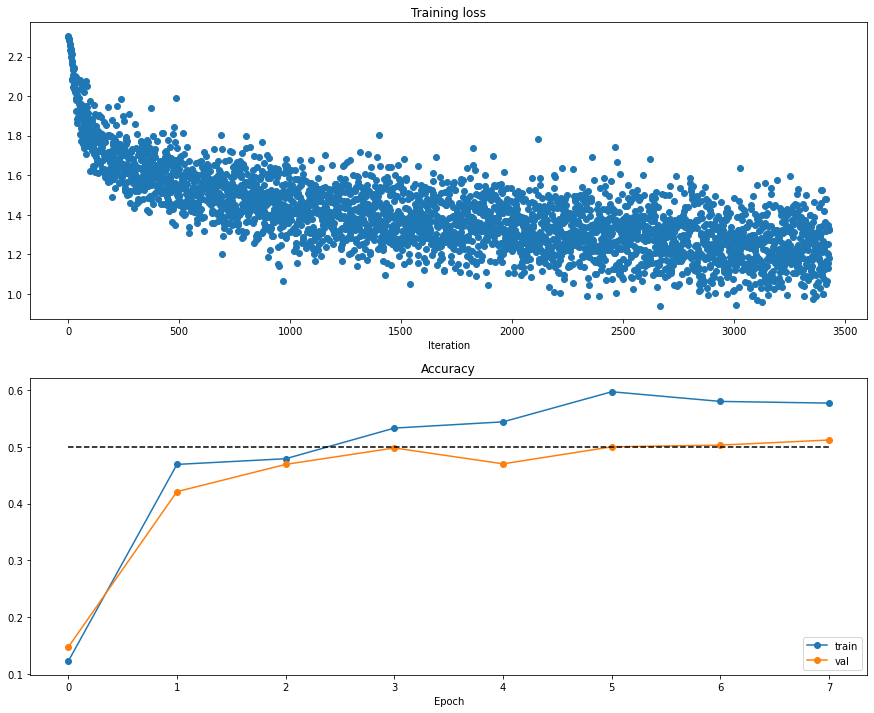

In [21]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(sgd_solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(sgd_solver.train_acc_history, '-o', label='train')
plt.plot(sgd_solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(sgd_solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Three-Layer Neural Network

use a `Solver` instance to train a `Three-Layer Neural` and plot the training loss as well as the accuracy cruve.

In [22]:
model = ThreeLayerNet()
sgd_solver = None


data_dict = get_CIFAR10_data()

data = {
    'X_train': data_dict['X_train'],
    'y_train': data_dict['y_train'],
    'X_val': data_dict['X_val'],
    'y_val': data_dict['y_val'],
  }

sgd_solver = Solver(model, data,
                  update_rule='sgd',
                  optim_config={
                    'learning_rate': 1e-3,
                  },
                  lr_decay=0.95,
                  num_epochs=20, batch_size=100,
                  print_every=100)
sgd_solver.train()


(Iteration 1 / 9800) loss: 2.334133
(Epoch 0 / 20) train acc: 0.130000; val_acc: 0.103000
(Iteration 101 / 9800) loss: 2.082280
(Iteration 201 / 9800) loss: 1.991078
(Iteration 301 / 9800) loss: 1.982333
(Iteration 401 / 9800) loss: 1.873137
(Epoch 1 / 20) train acc: 0.359000; val_acc: 0.367000
(Iteration 501 / 9800) loss: 1.821329
(Iteration 601 / 9800) loss: 1.649595
(Iteration 701 / 9800) loss: 1.603116
(Iteration 801 / 9800) loss: 1.574195
(Iteration 901 / 9800) loss: 1.577542
(Epoch 2 / 20) train acc: 0.402000; val_acc: 0.410000
(Iteration 1001 / 9800) loss: 1.626681
(Iteration 1101 / 9800) loss: 1.499613
(Iteration 1201 / 9800) loss: 1.695314
(Iteration 1301 / 9800) loss: 1.624111
(Iteration 1401 / 9800) loss: 1.555690
(Epoch 3 / 20) train acc: 0.452000; val_acc: 0.451000
(Iteration 1501 / 9800) loss: 1.555512
(Iteration 1601 / 9800) loss: 1.576990
(Iteration 1701 / 9800) loss: 1.709909
(Iteration 1801 / 9800) loss: 1.624699
(Iteration 1901 / 9800) loss: 1.602087
(Epoch 4 / 20) t

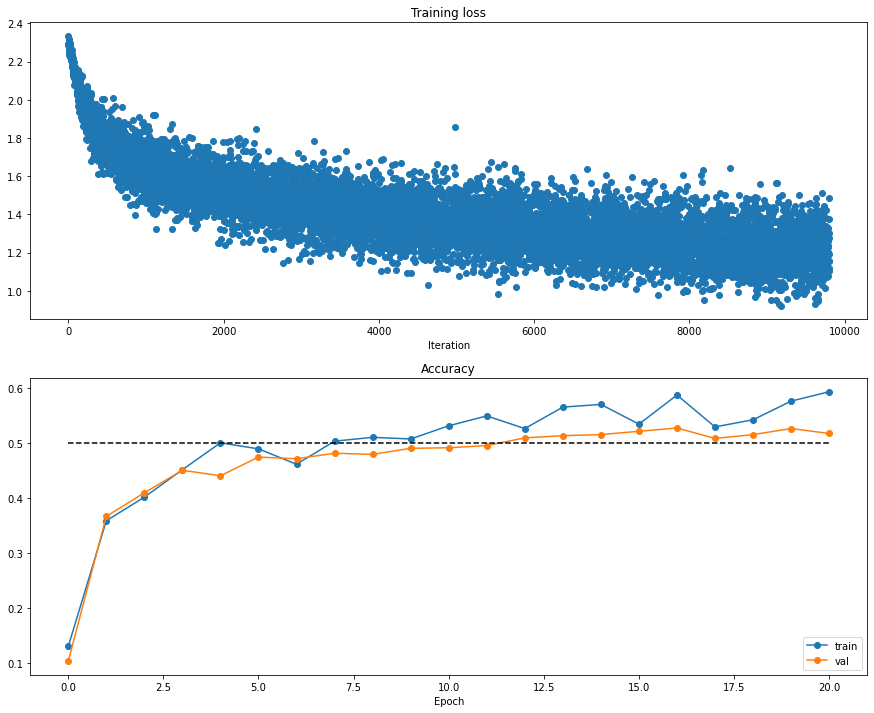

In [23]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(sgd_solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(sgd_solver.train_acc_history, '-o', label='train')
plt.plot(sgd_solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(sgd_solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Tensorflow Implementation

In the following section we will build multiple layer preceptron with tensorflow.

In [24]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Parameters 
learning_rate = 1e-3
training_epochs = 10
batch_size = 100
display_step = 1
# 3072
input_dim = 32*32*3
num_classes = 10

# input placeholder
x = tf.placeholder(tf.float32, [None, input_dim])
y = tf.placeholder(tf.float32, [None, num_classes])

# hidden_dims is a list, the element of the list represents the number of hidden unit for that layer
def tf_nn(input_dim, hidden_dims, num_classes, activation = "relu"):
    
    previous_layer_dim = input_dim
    previous_layer_output = x
    
    for hidden_layer in hidden_dims:
        
        h = tf.Variable(tf.random_normal([previous_layer_dim, hidden_layer]), dtype=tf.float32)
        bias = tf.Variable(tf.random_normal([hidden_layer, 1]), dtype=tf.float32)
        
        previous_layer_dim = hidden_layer
        if activation == 'relu':
            layer_output = tf.nn.relu(tf.add(tf.matmul(previous_layer_output, h), bias)) 
        else:
            layer_output = tf.nn.sigmoid(tf.add(tf.matmul(previous_layer_output, h), bias))
        previous_layer_output = layer_output
    
    output = tf.Variable(tf.random_normal([previous_layer_dim, num_classes]))
    bias_output = tf.Variable(tf.random_normal([num_classes]))
    output_layer = tf.matmul(layer_output, output) + bias_output
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = output_layer, labels = y))
    
    correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
    return cost, accuracy

In [ ]:
cost, accuracy = tf_nn(input_dim, [100,100], num_classes, activation = "sigmoid")
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost) 
# Plot settings 
avg_set = [] 
epoch_set = [] 

# Initializing the variables 
init = tf.global_variables_initializer() 
data_dict = get_CIFAR10_data()

data = {
    'X_train': data_dict['X_train'],
    'y_train': data_dict['y_train'],
    'X_val': data_dict['X_val'],
    'y_val': data_dict['y_val'],
}

data['X_train'] = np.reshape(data['X_train'], [data['X_train'].shape[0], 3*32*32])
data['y_train'] = data['y_train'].astype('int') 
batch_ys_final= np.zeros([data['y_train'].shape[0], num_classes])
batch_ys_final[np.arange(data['y_train'].shape[0]), data['y_train']] = 1
data['y_train'] = batch_ys_final

data['X_val'] = np.reshape(data['X_val'], [data['X_val'].shape[0], 3*32*32])
data['y_val'] = data['y_val'].astype('int') 
y_validation= np.zeros([data['y_val'].shape[0], num_classes])
y_validation[np.arange(data['y_val'].shape[0]), data['y_val']] = 1
data['y_val'] = y_validation

# Launch the graph 
with tf.Session() as sess: 
    sess.run(init) 
   
    # Training cycle
    for epoch in range(training_epochs): 
        avg_cost = 0.
        avg_acc = 0.
        total_batch = int(len(data['X_train']) / batch_size) 

        # Loop over all batches 
        for i in range(1, total_batch+1): 
            
            #print("from index %d to index %d " % (batch_size * (i-1), batch_size * i))
            batch_xs = data['X_train'][batch_size * (i-1): batch_size * i]
            batch_ys = data['y_train'][batch_size * (i-1): batch_size * i]
            if i == total_batch:
                batch_xs = data['X_train'][batch_size * (i-1): ]
                batch_ys = data['y_train'][batch_size * (i-1): ]

            # Fit training using batch data 
            sess.run(optimizer, feed_dict = {x: batch_xs, y: batch_ys}) 
            avg_cost += sess.run(cost, feed_dict = {x: batch_xs, y: batch_ys}) / total_batch
            acc = sess.run(accuracy, feed_dict = {x: batch_xs, y: batch_ys})
            # cost_temp = sess.run(cost, feed_dict = {x: batch_xs, y: batch_ys_final}) 
            # Display logs per epoch step 
        if epoch % display_step == 0: 
            print('Epoch : ', (epoch + 1))
            print('avg_cost : ', avg_cost)
            print('training accuracy : ', acc)
            ##############################################################################
            # TODO: here we evaluate the training accuracy, you need you evaluate the    #
            # validation accuracy as well and save it in a variable named val_acc        #
            ##############################################################################

            val_acc = sess.run(accuracy, feed_dict = {x: data['X_val'], y: data['y_val']}) 
            
            ##############################################################################
            # End your code here                                                         #
            ##############################################################################
            print('validation accuracy : ', val_acc)
        avg_set.append(avg_cost) 
        epoch_set.append(epoch + 1)
print ("Training phase finished" )

In [ ]:
plt.plot(epoch_set, avg_set, 'o', label = 'MLP Training phase') 
plt.ylabel('cost') 
plt.xlabel('epoch') 
plt.legend() 
plt.show() 

# Keras Implementation

Here is an example to use keras to build a fully connected network, you can see the code is more concise and more abstract.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Activation, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import SGD

In [ ]:
# Multilayer Perceptron (MLP) for multi-class softmax classification:
# ===================================================================

model = Sequential()

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
               optimizer='adam',
               lr=0.0001,
               metrics=['accuracy'])

model.summary()

In [ ]:
data = {
    'X_train': data_dict['X_train'],
    'y_train': data_dict['y_train'],
    'X_val': data_dict['X_val'],
    'y_val': data_dict['y_val'],
}

data['X_train'] = np.reshape(data['X_train'], [data['X_train'].shape[0], 32, 32, 3])
data['y_train'] = data['y_train'].astype('int') 
batch_ys_final= np.zeros([data['y_train'].shape[0], num_classes])
batch_ys_final[np.arange(data['y_train'].shape[0]), data['y_train']] = 1
data['y_train'] = batch_ys_final

data['X_val'] = np.reshape(data['X_val'], [data['X_val'].shape[0], 32, 32, 3])
data['y_val'] = data['y_val'].astype('int') 
y_validation= np.zeros([data['y_val'].shape[0], num_classes])
y_validation[np.arange(data['y_val'].shape[0]), data['y_val']] = 1
data['y_val'] = y_validation


hist1 = model.fit(data['X_train'], data['y_train'],
                   epochs=10,
                   batch_size=32,
                   validation_data=(data['X_val'], data['y_val']))

# Training A Three-Layer Neural Network on MINIST Dataset

You've seen how to train and evaluate your neural network model on CIFAR10 dataset, it's your turn to train a three-layer Neural Network on MINIST Dataset.  Implement the model with Tensorflow or Keras. Tune the parameters to find the best hyperparameters for your model. 

In [ ]:
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", X_test.shape)
print("y_test shape", y_test.shape)


In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

In [ ]:
nb_classes = 10 

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes) 

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=8, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# Question:  What did you discover with hyperparameter tuning?


The batch size is how many samples we use for one update to the model weights. Epochs is how many times we want to iterate on the whole training set. Generally with smaller batch, the more unstable the stochastic updates are. Using too high of epochs will cause the model to overfit.